In [1]:
import sys
sys.path.append(r"D:\ig_pipeline")

import glob
import os
from b1k_pipeline.urdfpy import URDF
import trimesh
import numpy as np
from tqdm.notebook import tqdm
import json

In [2]:
obj_dirs = glob.glob(r"D:\ig_pipeline\artifacts\aggregate\objects\*\*")
print(len(obj_dirs))

765


In [3]:
with open(r"D:\ig_pipeline\artifacts\pipeline\object_inventory.json", "r") as f:
    providers = json.load(f)["providers"]

In [4]:
def get_dimensions(obj_dir):
    obj_urdf, = glob.glob(os.path.join(obj_dir, "*.urdf"))
    obj = URDF.load(obj_urdf)

    fk = obj.collision_trimesh_fk()
    links = []
    for link, transform in fk.items():
        link = link.copy()
        link.apply_transform(transform)
        links.append(link)
    obj_mesh = trimesh.util.concatenate(links)
    bbox = obj_mesh.bounding_box.extents
    return bbox

In [5]:
boxes = {obj_dir: get_dimensions(obj_dir) for obj_dir in tqdm(obj_dirs)}

  0%|          | 0/765 [00:00<?, ?it/s]

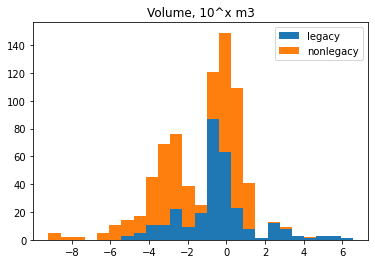

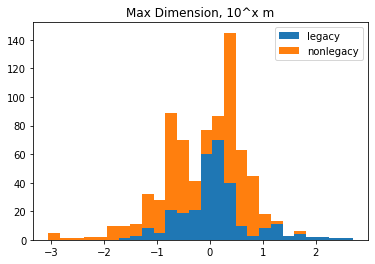

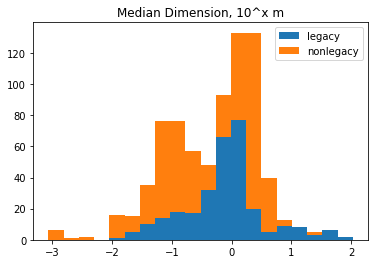

In [8]:
import matplotlib.pyplot as plt

def vol():
    basename_to_dims = {os.path.basename(os.path.dirname(k)) + "-" + os.path.basename(k): np.prod(v) for k, v in boxes.items()}
    legacy_dims = np.asarray([np.log(dim) / np.log(10) for k, dim in basename_to_dims.items() if "legacy_" in providers[k]])
    nonlegacy_dims = np.asarray([np.log(dim) / np.log(10) for k, dim in basename_to_dims.items() if "legacy_" not in providers[k]])

    _ = plt.hist([legacy_dims, nonlegacy_dims], bins='auto', label=["legacy", "nonlegacy"], stacked=True)
    plt.title("Volume, 10^x m3")
    plt.legend()
    plt.show()
    
def maxdim():
    basename_to_dims = {os.path.basename(os.path.dirname(k)) + "-" + os.path.basename(k): np.max(v) for k, v in boxes.items()}
    legacy_dims = np.asarray([np.log(dim) / np.log(10) for k, dim in basename_to_dims.items() if "legacy_" in providers[k]])
    nonlegacy_dims = np.asarray([np.log(dim) / np.log(10) for k, dim in basename_to_dims.items() if "legacy_" not in providers[k]])

    _ = plt.hist([legacy_dims, nonlegacy_dims], bins='auto', label=["legacy", "nonlegacy"], stacked=True)
    plt.title("Max Dimension, 10^x m")
    plt.legend()
    plt.show()
    
def mediandim():
    basename_to_dims = {os.path.basename(os.path.dirname(k)) + "-" + os.path.basename(k): np.median(v) for k, v in boxes.items()}
    legacy_dims = np.asarray([np.log(dim) / np.log(10) for k, dim in basename_to_dims.items() if "legacy_" in providers[k]])
    nonlegacy_dims = np.asarray([np.log(dim) / np.log(10) for k, dim in basename_to_dims.items() if "legacy_" not in providers[k]])

    _ = plt.hist([legacy_dims, nonlegacy_dims], bins='auto', label=["legacy", "nonlegacy"], stacked=True)
    plt.title("Median Dimension, 10^x m")
    plt.legend()
    plt.show()
    
vol()
maxdim()
mediandim()

In [ ]:
objects_to_include = sorted({providers[os.path.basename(os.path.dirname(k)) + "-" + os.path.basename(k)].replace("objects/", "") for k in obj_dirs})

In [ ]:
print("\n".join(f'"{x}",' for x in objects_to_include))